# Домашнее задание № 2.<br> Визуальный анализ данных о публикациях на Хабрахабре

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [2]:
df = pd.read_csv('../Data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(2).T

,0,1
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/
domain,habrahabr.ru,habrahabr.ru
post_id,18284,18285
published,2008-01-01 18:19:00,2008-01-01 18:30:00
author,@Tapac,@DezmASter
flow,develop,design
polling,False,False
content_len,4305,7344
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/company/madrobots/blog/24...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

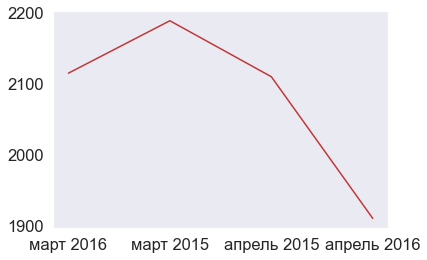

In [11]:
March_2016 = df[(df['year'] == 2016)&(df['month'] == 3)]
March_2015 = df[(df['year'] == 2015)&(df['month'] == 3)]
April_2015 = df[(df['year'] == 2015)&(df['month'] == 4)]
April_2016 = df[(df['year'] == 2016)&(df['month'] == 4)]
most_month_dict = {
    'март 2016' : len(March_2016),
    'март 2015' : len(March_2015),
    'апрель 2015' : len(April_2015),
    'апрель 2016' : len(April_2016),
}
plt.plot(list(most_month_dict.keys()),list(most_month_dict.values())); # график словаря

По графику видно, что <b>больше всего публикаций в марте 2015 года</b>

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

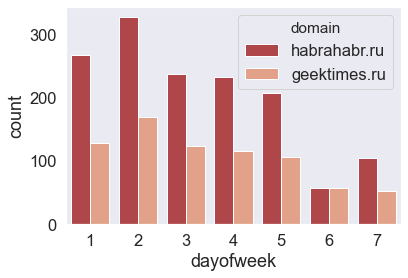

In [25]:
sns.countplot(x='dayofweek', hue='domain', data=March_2015);

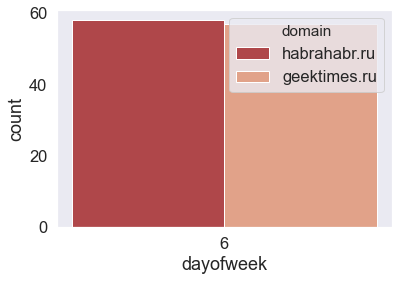

In [13]:
sns.countplot(x='dayofweek', hue='domain', data=March_2015[March_2015['dayofweek']==6]);

Теперь точно видно, что в сб на хабре больше статей

* __Вторник__ сильно выделяется из общей картины
* На хабре __всегда__ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют __примерно одинаковое число__ статей

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [14]:
df.head(1)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18


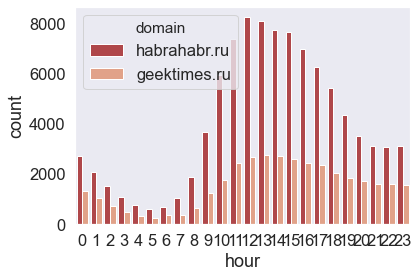

In [15]:
sns.countplot(x='hour', hue='domain', data=df);

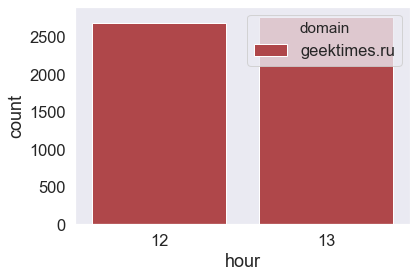

In [16]:
df_geektimes_12_13 = df[((df['hour']==13)|(df['hour']==12))&(df['domain']=='geektimes.ru')]
sns.countplot(x='hour', hue='domain', data=df_geektimes_12_13);

<p>Больше всего просмотров набирают статьи, опубликованные в <b>12 часов дня только на habrahabr.ru</b>.</p>
<p>На geektimes.ru больше просмотров в <b>13:00</b>.</p>

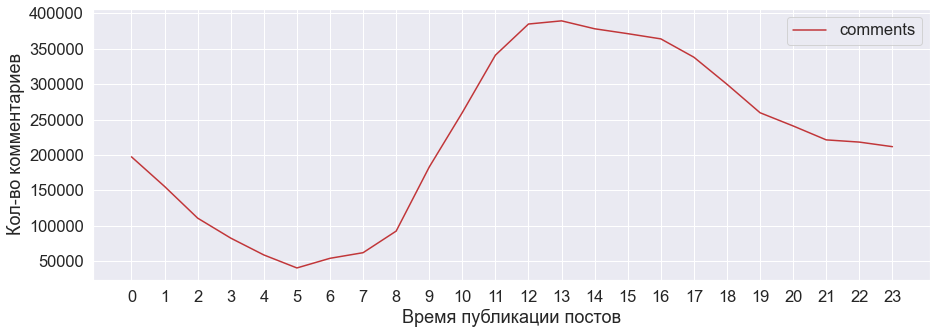

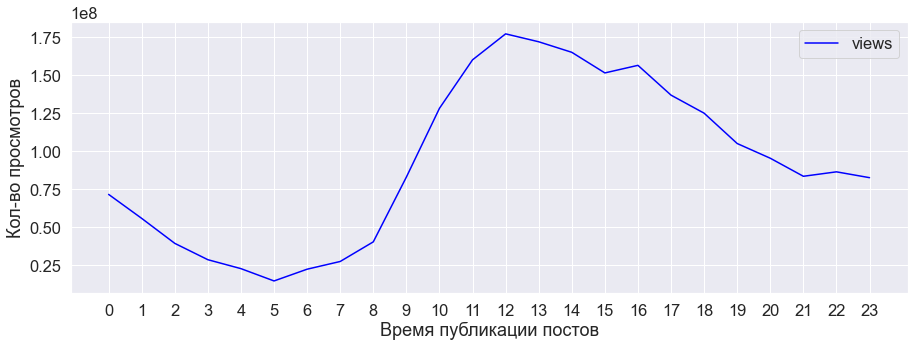

In [17]:
graf_com = df[['hour','comments']].groupby('hour').sum().plot(rot=0, figsize=(15, 5), grid=True)
graf_views = df[['hour','views']].groupby('hour').sum().plot(rot=0, figsize=(15, 5), grid=True, color='blue')
graf_com.set_xticks(df['hour'].unique()); # задаем значения по оси Х (чтобы показывались все значения)
graf_com.set_ylabel('Кол-во комментариев'); # подпись Оси y
graf_com.set_xlabel('Время публикации постов'); # подпись Оси y
graf_views.set_xticks(df['hour'].unique()); # задаем значения по оси Х (чтобы показывались все значения)
graf_views.set_ylabel('Кол-во просмотров'); # подпись Оси y
graf_views.set_xlabel('Время публикации постов'); # подпись Оси y

У опубликованных в 10 утра постов __НЕ больше всего комментариев__. Больше всего у постов, опубликованных в __13 дня__

Больше всего просмотров набирают статьи, опубликованные в __12 дня__, а не в 6 утра

In [18]:
df_geektimes = df[df['domain']=='geektimes.ru'].sort_values('comments', ascending=False)
df_geektimes.head(0)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour


In [19]:
int(df_geektimes[df_geektimes['comments']==df_geektimes['comments'].max()]['hour'])

2

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная __не в 9 часов вечера__, а __в 2 часа ночи__

Будем считать, что _ночные комментарии_ это комментарии _с 00:00 по 05:00_ , а все остальные дневные

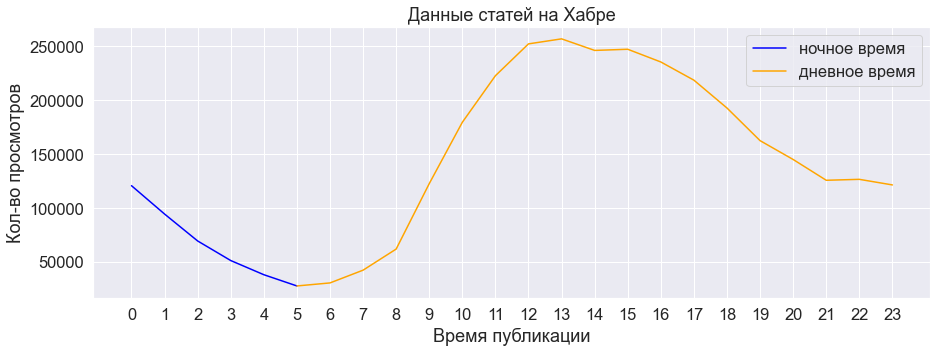

In [20]:
df_n = df[(df['hour']<=5)&(df['domain']=='habrahabr.ru')]
df_d = df[(df['hour']>4)&(df['domain']=='habrahabr.ru')]
ax_n = df_n[['hour','comments']].groupby('hour').sum()
ax_d = df_d[['hour','comments']].groupby('hour').sum()

plt.figure(figsize=(15,5))
plt.grid()
plt.xticks(df['hour'].unique())
plt.xlabel('Время публикации')
plt.ylabel('Кол-во просмотров')
plt.title('Данные статей на Хабре');
plt.plot(ax_n, color='blue', label='ночное время')
plt.plot(ax_d, color='orange', label='дневное время')
plt.legend();

На хабре __дневные статьи комментируют чаще__, чем вечерние

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [21]:
df[df['author'].isin(['@Mordatyj','@Mithgol','@alizar','@ilya42'])].loc[:,['author','votes_minus']].groupby('author').describe()

votes_minus                                                   
                count       mean        std  min  25%   50%   75%    max
author                                                                  
@Mithgol        555.0  20.481081  19.296123  1.0  9.0  15.0  26.0  204.0
@Mordatyj       543.0   7.471455   7.118567  0.0  3.0   6.0   9.5   57.0
@alizar        5264.0   7.928191   8.458220  0.0  3.0   5.0  10.0  131.0
@ilya42         512.0   6.216797   6.020015  0.0  3.0   5.0   8.0   47.0

Судя по колонке "count" больше всего минусов у __@alizar__

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [22]:
df[df['dayofweek'].isin([1,6])].loc[:,['dayofweek', 'hour']].groupby('dayofweek').describe()

hour                                                  
             count       mean       std  min   25%   50%   75%   max
dayofweek                                                           
1          23636.0  13.767939  5.235694  0.0  11.0  14.0  17.0  23.0
6           8380.0  13.522912  6.893133  0.0  10.0  15.0  19.0  23.0

__Нет, не правда__. "mean" почти одинаковое. Окло 2х дня